In [41]:
# import necessary packages
import pandas as pd
import plotly.express as px
import statsmodels.api as sm

# Sleep Cycle & Productivity

This sleep cycle and productivity dataset was taken from Kaggle<sup>1</sup>. The dataset contains 5000 records of the sleep habits of multiple individuals of varying ages and lifestyles and their impact on productivity, mood, and stress levels.

It contains the following columns:
| Column Name                         | Description                                            | Type of Data |
|-------------------------------------|--------------------------------------------------------|--------------|
| Date                                | The date of data collection                            |              |
| Person_ID                           | Unique identifier for each individual                  |              |
| Age                                 | Age of the person (18-60 years)                        | Numerical    |
| Gender                              | Male, Female, or Other                                 | Categorical  |
| Sleep Start Time                    | Time when the person went to bed (in 24-hour format)   |              |
| Sleep End Time                      | Time when the person woke up (in 24-hour format)       |              |
| Total Sleep Hours                   | Total duration of sleep (in hours)                     | Numerical    |
| Sleep Quality                       | Self-reported sleep quality (scale: 1-10)              | Categorical  |
| Exercise (mins/day)                 | Minutes spent exercising per day                       | Numerical    |
| Caffeine Intake (mg)                | Amount of caffeine consumed in mg                      | Numerical    |
| Screen Time Before Bed (mins)       | Time spent using screens before sleeping               | Numerical    |
| Work Hours (hrs/day)                | Total working hours in a day                           | Numerical    |
| Productivity Score                  | Self-reported productivity score (scale: 1-10)         | Categorical  |
| Mood Score                          | Self-reported mood score (scale: 1-10)                 | Categorical  |
| Stress Level                        | Self-reported stress level (scale: 1-10)               | Categorical  |

1. https://www.kaggle.com/datasets/adilshamim8/sleep-cycle-and-productivity/data

In [5]:
# import dataset
sleep_cycle_prod = pd.read_csv("sleep_cycle_productivity.csv")
sleep_cycle_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           5000 non-null   object 
 1   Person_ID                      5000 non-null   int64  
 2   Age                            5000 non-null   int64  
 3   Gender                         5000 non-null   object 
 4   Sleep Start Time               5000 non-null   float64
 5   Sleep End Time                 5000 non-null   float64
 6   Total Sleep Hours              5000 non-null   float64
 7   Sleep Quality                  5000 non-null   int64  
 8   Exercise (mins/day)            5000 non-null   int64  
 9   Caffeine Intake (mg)           5000 non-null   int64  
 10  Screen Time Before Bed (mins)  5000 non-null   int64  
 11  Work Hours (hrs/day)           5000 non-null   float64
 12  Productivity Score             5000 non-null   i

## 1. Demographics

In [6]:
# number of unique individuals available
sleep_cycle_prod["Person_ID"].nunique() 

3858

➡️ The dataset contains records from 3858 individuals

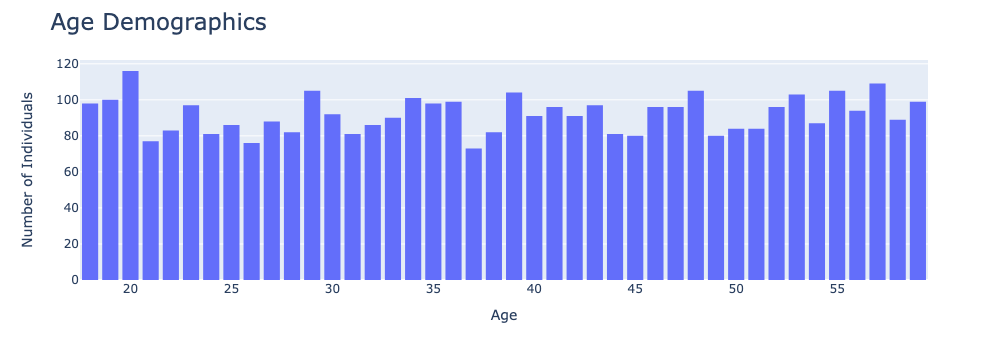

In [67]:
# create a dataframe containing demographics of the individuals
demographics = sleep_cycle_prod[["Person_ID", "Age", "Gender"]]
demographics = demographics.drop_duplicates("Person_ID")

# create a histogram showing the age demographics of the dataset
fig = px.histogram(demographics,
                   x = "Age")

# update formatting
fig.update_layout(bargap = 0.2,
                  title_text = "Age Demographics",
                  title_font_size = 23,
                  yaxis_title = "Number of Individuals")

# show figure
fig.show()

In [70]:
# summary statistics of the age demographics
demographics["Age"].describe()

count    3858.000000
mean       38.685329
std        12.256315
min        18.000000
25%        28.000000
50%        39.000000
75%        49.000000
max        59.000000
Name: Age, dtype: float64

➡️ There's a relatively equal representation of individuals ranging from 18-59 years old.

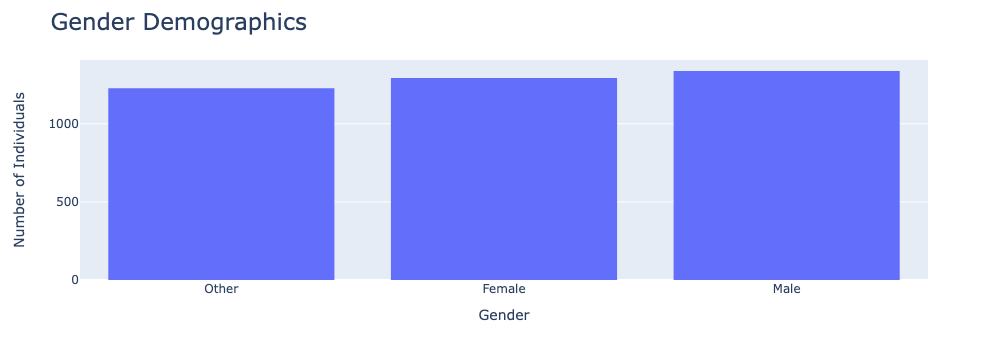

In [68]:
# create a histogram showing the gender demographics of the dataset
fig = px.histogram(demographics,
                   x = "Gender")

# update formatting
fig.update_layout(bargap = 0.2,
                  title_text = "Gender Demographics",
                  title_font_size = 23,
                  yaxis_title = "Number of Individuals")

# show figure
fig.show()

➡️ There's a good representation of individuals of varying genders available.

## 2. Does sleep duration affect productivity and if so, in what way?

### *Cleaning the data*

In [22]:
# create a new dataframe containing the relevant information for research question
sleep_duration_prod = sleep_cycle_prod[["Person_ID", "Total Sleep Hours", "Productivity Score"]].copy()
# aggregate records from same individual by taking the average hours slept and productivity score
sleep_duration_prod

,Person_ID,Total Sleep Hours,Productivity Score
0,1860,5.28,8
1,1769,5.41,10
2,2528,5.35,10
3,8041,7.55,8
4,4843,6.75,8
...,...,...,...
4995,5192,5.37,5
4996,7134,7.91,5
4997,6265,4.80,2
4998,4205,8.40,8


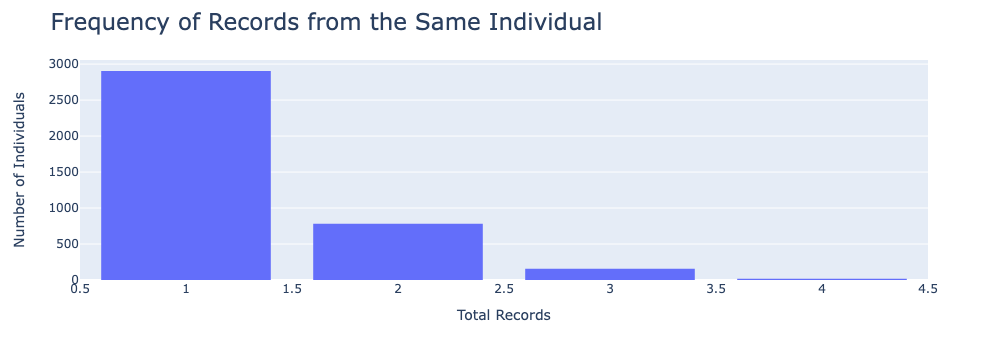

In [111]:
# create a dataframe summarizing the number of records from each individual
num_records = sleep_duration_prod["Person_ID"].value_counts().reset_index()
# create a histogram to show the frequency of number of records from an individual
fig = px.histogram(num_records,
                   x = "count")

# update formatting
fig.update_layout(bargap = 0.2,
                  title_text = "Frequency of Records from the Same Individual",
                  title_font_size = 23,
                  xaxis_title = "Total Records",
                  yaxis_title = "Number of Individuals")
                  
# show figure 
fig.show()

Results here indicate that there are 954 individuals with 2+ records. Having multiple records from the same individual could introduce a bias so I've decided to aggregate the data by taking the average sleep duration and productivity score across all records from each individual. Additionally, because productivity score is ordinal data with a scale from 1 to 10, I round the average productivity scores to the nearest even number.

In [104]:
# remove duplicate records from same individual by taking the average
avg_sleep_duration_prod = sleep_duration_prod.groupby("Person_ID").mean()
# since productivity score is categorical, round the values to the nearest even number
avg_sleep_duration_prod["Productivity Score (rounded)"] = avg_sleep_duration_prod["Productivity Score"].round()
avg_sleep_duration_prod.drop("Productivity Score", axis=1)

,Total Sleep Hours,Productivity Score (rounded)
Person_ID,,
1000,5.375,2.0
1001,8.540,6.0
1003,6.780,6.0
1006,6.230,1.0
1007,7.730,2.0
...,...,...
9982,9.300,1.0
9988,7.170,2.0
9989,7.070,9.0


### *Data visualization*

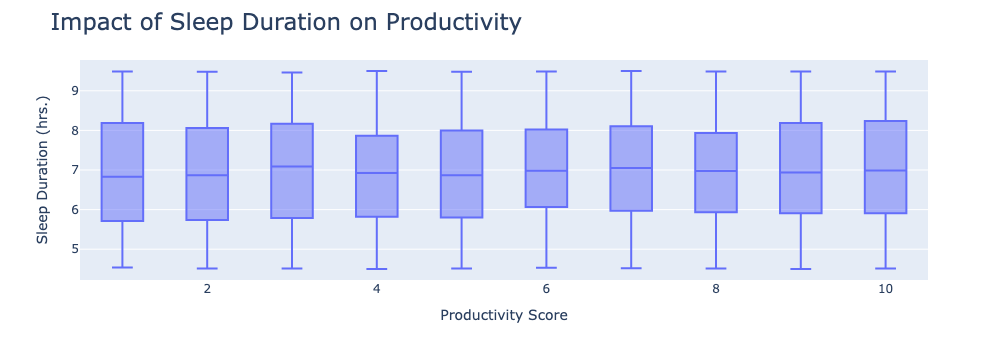

In [106]:
# create a box plot comparing sleep duration and productivity
fig = px.box(avg_sleep_duration_prod,
             x = "Productivity Score (rounded)",
             y = "Total Sleep Hours")

# adjust formatting
fig.update_layout(title_text = "Impact of Sleep Duration on Productivity",
                  title_font_size = 23,
                  xaxis_title = "Productivity Score",
                  yaxis_title = "Sleep Duration (hrs.)")
             
# show plot
fig.show()

The box plot above describes the sleep duration across 3858 individual and their productivity scores. Results indicate that individuals at each level of productivity had similar sleep durations.

### *Statistical modeling to assess hypothesis*

In [26]:
### create a multinomial logistic regression model to test this hypothesis
sleep_duration_prod_y = avg_sleep_duration_prod["Average Productivity Score"] # define output
sleep_duration_prod_X = avg_sleep_duration_prod["Total Sleep Hours"] # define input
sleep_duration_prod_X = sm.add_constant(sleep_duration_prod_X) # include constant column
sleep_duration_prod_model = sm.MNLogit(sleep_duration_prod_y, sleep_duration_prod_X).fit()

### get summary statistics
sleep_duration_prod_model.summary()

Optimization terminated successfully.
         Current function value: 2.281237
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                              MNLogit Regression Results                              
======================================================================================
Dep. Variable:     Average Productivity Score   No. Observations:                 3858
Model:                                MNLogit   Df Residuals:                     3840
Method:                                   MLE   Df Model:                            9
Date:                        Wed, 12 Mar 2025   Pseudo R-squ.:               0.0003835
Time:                                14:26:24   Log-Likelihood:                -8801.0
converged:                               True   LL-Null:                       -8804.4
Covariance Type:                    nonrobust   LLR p-value:                    0.6629
=================================================================================================
 Average Productivity Score=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.5383      0.426      1.262      0.207      -0.298       1.374
Total Sleep Hours                -0.0163      0.060     -0.270      0.788      -0.135       0.102
-------------------------------------------------------------------------------------------------
Average Productivity Score=3       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0639      0.440      0.145      0.884      -0.798       0.925
Total Sleep Hours                0.0341      0.062      0.551      0.582      -0.087       0.155
------------------------------------------------------------------------------------------------
Average Productivity Score=4       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.8696      0.408      2.131      0.033       0.070       1.669
Total Sleep Hours               -0.0303      0.058     -0.523      0.601      -0.144       0.083
------------------------------------------------------------------------------------------------
Average Productivity Score=5       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.4448      0.431      1.032      0.302      -0.400       1.290
Total Sleep Hours               -0.0102      0.061     -0.167      0.867      -0.130       0.109
------------------------------------------------------------------------------------------------
Average Productivity Score=6       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.4283      0.403      1.062      0.288      -0.362       1.219
Total Sleep Hours                0.0488      0.057      0.859      0.390      -0.063       0.160
------------------------------------------------------------------------------------------------
Average Productivity Score=7       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1126      0.424      0.266      0.791      -0.719       0.944
Total Sleep Hours                0.0536      0.060      0.898      0.369      -0.063       0.170
------------------------------------------------------------------------------------------------
Average Productivity Score=8       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------

Results from the Likelihood Ratio Test (*p* > 0.05) further support box plot, suggesting that sleep duration does not seem to impact productivity.

## 3. How does exercise, caffeine, and screen time affect sleep quality?

To assess this, I can ask whether each feature (exercise, caffeine, and screen time) alone impact sleep quality. Similar to the previous question, I will aggregate records from the same individual by taking the average. Since sleep quality is categorical, I will round the values to the nearest even number.

In [75]:
# create a dataframe containing the relevant information
cols = ["Person_ID", "Exercise (mins/day)", "Caffeine Intake (mg)", "Screen Time Before Bed (mins)", "Sleep Quality"]
sleep_quality = sleep_cycle_prod[cols].copy()
# remove duplicate records from same individual by taking the average
avg_sleep_quality = sleep_quality.groupby("Person_ID").mean()
# add a column with the sleep quality scores rounded to the nearest even number
avg_sleep_quality["Sleep Quality (rounded)"] = avg_sleep_quality["Sleep Quality"].round()
avg_sleep_quality.drop("Sleep Quality", axis=1)

,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Sleep Quality (rounded)
Person_ID,,,,
1000,74.0,67.0,85.50,7.0
1001,55.0,113.0,73.00,10.0
1003,12.5,134.0,97.00,6.0
1006,18.0,156.0,145.00,4.0
1007,15.0,100.0,173.00,7.0
...,...,...,...,...
9982,9.0,289.0,64.00,3.0
9988,33.0,159.0,116.00,2.0
9989,33.5,162.0,59.25,4.0


### *Does exercise affect sleep quality?*

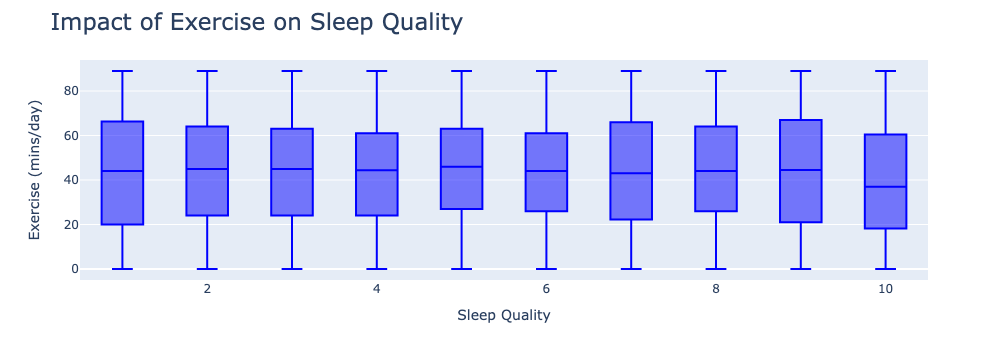

In [116]:
# create a box plot comparing exercise and sleep quality
fig = px.box(avg_sleep_quality,
             x = "Sleep Quality (rounded)",
             y = "Exercise (mins/day)")

# adjust formatting
fig.update_traces(marker_color="blue")
fig.update_layout(title_text = "Impact of Exercise on Sleep Quality",
                  title_font_size = 23,
                  xaxis_title = "Sleep Quality",
                  yaxis_title = "Exercise (mins/day)")
             
# show plot
fig.show()

The bar plot above describes the average amount of exercise (mins/day) across individuals at each level of sleep quality. Results suggest that individuals across all sleep quality levels all had similar levels of exercise.

In [54]:
### create a multinomial logistic regression model to test this hypothesis
sleep_quality_exercise_y = avg_sleep_quality["Sleep Quality (rounded)"] # define output
sleep_quality_exercise_X = avg_sleep_quality["Exercise (mins/day)"] # define input
sleep_quality_exercise_X = sm.add_constant(sleep_quality_exercise_X) # include constant column
sleep_quality_exercise_model = sm.MNLogit(sleep_quality_exercise_y, sleep_quality_exercise_X).fit()

### get summary statistics
sleep_quality_exercise_model.summary()

Optimization terminated successfully.
         Current function value: 2.281456
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                             MNLogit Regression Results                            
===================================================================================
Dep. Variable:     Sleep Quality (rounded)   No. Observations:                 3858
Model:                             MNLogit   Df Residuals:                     3840
Method:                                MLE   Df Model:                            9
Date:                     Wed, 12 Mar 2025   Pseudo R-squ.:               0.0005730
Time:                             15:00:16   Log-Likelihood:                -8801.9
converged:                            True   LL-Null:                       -8806.9
Covariance Type:                 nonrobust   LLR p-value:                    0.3430
==============================================================================================
 Sleep Quality (rounded)=2       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2334      0.165      1.417      0.156      -0.089       0.556
Exercise (mins/day)            0.0008      0.003      0.237      0.812      -0.006       0.007
----------------------------------------------------------------------------------------------
Sleep Quality (rounded)=3       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1737      0.167      1.040      0.299      -0.154       0.501
Exercise (mins/day)           0.0006      0.003      0.173      0.862      -0.006       0.007
---------------------------------------------------------------------------------------------
Sleep Quality (rounded)=4       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.5289      0.155      3.413      0.001       0.225       0.833
Exercise (mins/day)           0.0011      0.003      0.365      0.715      -0.005       0.007
---------------------------------------------------------------------------------------------
Sleep Quality (rounded)=5       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2935      0.161      1.823      0.068      -0.022       0.609
Exercise (mins/day)           0.0027      0.003      0.849      0.396      -0.004       0.009
---------------------------------------------------------------------------------------------
Sleep Quality (rounded)=6       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.6186      0.153      4.051      0.000       0.319       0.918
Exercise (mins/day)           0.0009      0.003      0.282      0.778      -0.005       0.007
---------------------------------------------------------------------------------------------
Sleep Quality (rounded)=7       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.3054      0.162      1.883      0.060      -0.013       0.623
Exercise (mins/day)           0.0007      0.003      0.222      0.824      -0.006       0.007
---------------------------------------------------------------------------------------------
Sleep Quality (rounded)=8       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2852      0.162      1.765      0.078      -0.032       

Results from the Likelihood Ratio Test (*p* > 0.05) further support box plot, suggesting that exercise does not seem to impact sleep quality.

### *Does caffeine intake affect sleep quality?*

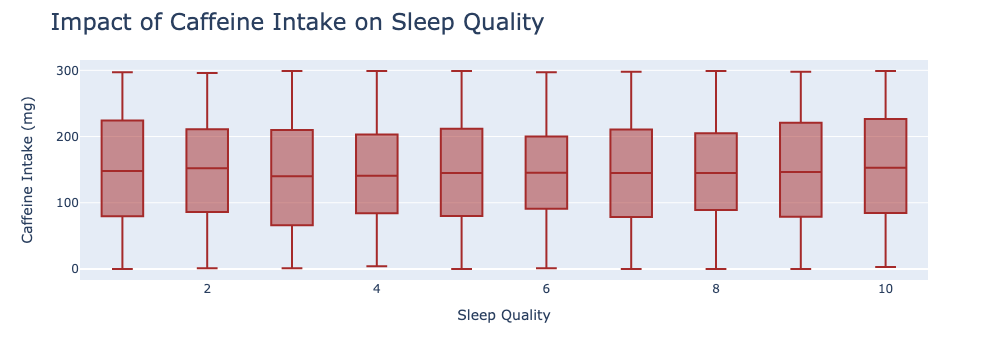

In [115]:
# create a box plot comparing exercise and sleep quality
fig = px.box(avg_sleep_quality,
             x = "Sleep Quality (rounded)",
             y = "Caffeine Intake (mg)")

# adjust formatting
fig.update_traces(marker_color="brown")
fig.update_layout(title_text = "Impact of Caffeine Intake on Sleep Quality",
                  title_font_size = 23,
                  xaxis_title = "Sleep Quality",
                  yaxis_title = "Caffeine Intake (mg)")
             
# show plot
fig.show()

The bar plot above describes the average caffeine intake (mg) across individuals at each level of sleep quality. Results suggest that individuals across all sleep quality levels all had similar amounts of caffeine intake.

In [52]:
### create a multinomial logistic regression model to test this hypothesis
sleep_quality_caffeine_y = avg_sleep_quality["Sleep Quality (rounded)"] # define output
sleep_quality_caffeine_X = avg_sleep_quality["Caffeine Intake (mg)"] # define input
sleep_quality_caffeine_X = sm.add_constant(sleep_quality_caffeine_X) # include constant column
sleep_quality_caffeine_model = sm.MNLogit(sleep_quality_caffeine_y, sleep_quality_caffeine_X).fit()

### get summary statistics
sleep_quality_caffeine_model.summary()

Optimization terminated successfully.
         Current function value: 2.282102
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                             MNLogit Regression Results                            
===================================================================================
Dep. Variable:     Sleep Quality (rounded)   No. Observations:                 3858
Model:                             MNLogit   Df Residuals:                     3840
Method:                                MLE   Df Model:                            9
Date:                     Wed, 12 Mar 2025   Pseudo R-squ.:               0.0002903
Time:                             14:59:30   Log-Likelihood:                -8804.3
converged:                            True   LL-Null:                       -8806.9
Covariance Type:                 nonrobust   LLR p-value:                    0.8244
==============================================================================================
 Sleep Quality (rounded)=2       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2820      0.170      1.663      0.096      -0.050       0.614
Caffeine Intake (mg)       -9.617e-05      0.001     -0.096      0.923      -0.002       0.002
----------------------------------------------------------------------------------------------
Sleep Quality (rounded)=3       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.4006      0.169      2.369      0.018       0.069       0.732
Caffeine Intake (mg)         -0.0014      0.001     -1.363      0.173      -0.003       0.001
---------------------------------------------------------------------------------------------
Sleep Quality (rounded)=4       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.7264      0.158      4.601      0.000       0.417       1.036
Caffeine Intake (mg)         -0.0010      0.001     -1.072      0.284      -0.003       0.001
---------------------------------------------------------------------------------------------
Sleep Quality (rounded)=5       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.5102      0.163      3.123      0.002       0.190       0.830
Caffeine Intake (mg)         -0.0007      0.001     -0.671      0.502      -0.003       0.001
---------------------------------------------------------------------------------------------
Sleep Quality (rounded)=6       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.7447      0.156      4.759      0.000       0.438       1.051
Caffeine Intake (mg)         -0.0006      0.001     -0.643      0.520      -0.002       0.001
---------------------------------------------------------------------------------------------
Sleep Quality (rounded)=7       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.4167      0.166      2.509      0.012       0.091       0.742
Caffeine Intake (mg)         -0.0005      0.001     -0.546      0.585      -0.002       0.001
---------------------------------------------------------------------------------------------
Sleep Quality (rounded)=8       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.4633      0.165      2.816      0.005       0.141       

Results from the Likelihood Ratio Test (*p* > 0.05) further support box plot, suggesting that caffeine intake does not seem to impact sleep quality.

### *Does screen time before bed affect sleep quality?*

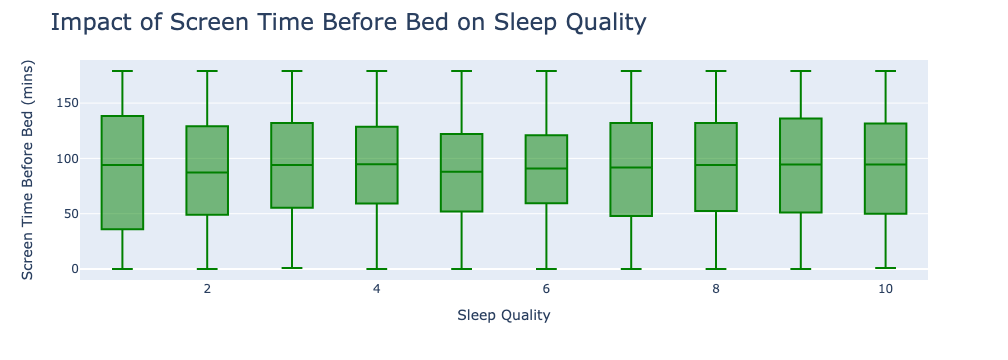

In [114]:
# create a box plot comparing exercise and sleep quality
fig = px.box(avg_sleep_quality,
             x = "Sleep Quality (rounded)",
             y = "Screen Time Before Bed (mins)")

# adjust formatting
fig.update_traces(marker_color="green")
fig.update_layout(title_text = "Impact of Screen Time Before Bed on Sleep Quality",
                  title_font_size = 23,
                  xaxis_title = "Sleep Quality",
                  yaxis_title = "Screen Time Before Bed (mins)")
             
# show plot
fig.show()

The bar plot above describes the average screen time before bed (mins) across individuals at each level of sleep quality. Results suggest that individuals across all sleep quality levels all had similar screen times before bed.

In [53]:
### create a multinomial logistic regression model to test this hypothesis
sleep_quality_screen_time_y = avg_sleep_quality["Sleep Quality (rounded)"] # define output
sleep_quality_screen_time_X = avg_sleep_quality["Screen Time Before Bed (mins)"] # define input
sleep_quality_screen_time_X = sm.add_constant(sleep_quality_screen_time_X) # include constant column
sleep_quality_screen_time_model = sm.MNLogit(sleep_quality_screen_time_y, sleep_quality_screen_time_X).fit()

### get summary statistics
sleep_quality_screen_time_model.summary()

Optimization terminated successfully.
         Current function value: 2.282093
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                             MNLogit Regression Results                            
===================================================================================
Dep. Variable:     Sleep Quality (rounded)   No. Observations:                 3858
Model:                             MNLogit   Df Residuals:                     3840
Method:                                MLE   Df Model:                            9
Date:                     Wed, 12 Mar 2025   Pseudo R-squ.:               0.0002942
Time:                             14:59:40   Log-Likelihood:                -8804.3
converged:                            True   LL-Null:                       -8806.9
Covariance Type:                 nonrobust   LLR p-value:                    0.8182
=================================================================================================
    Sleep Quality (rounded)=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.4011      0.169      2.374      0.018       0.070       0.732
Screen Time Before Bed (mins)    -0.0015      0.002     -0.899      0.369      -0.005       0.002
-------------------------------------------------------------------------------------------------
    Sleep Quality (rounded)=3       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.1343      0.175      0.768      0.443      -0.208       0.477
Screen Time Before Bed (mins)     0.0007      0.002      0.417      0.676      -0.003       0.004
-------------------------------------------------------------------------------------------------
    Sleep Quality (rounded)=4       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.5015      0.162      3.097      0.002       0.184       0.819
Screen Time Before Bed (mins)     0.0008      0.002      0.535      0.592      -0.002       0.004
-------------------------------------------------------------------------------------------------
    Sleep Quality (rounded)=5       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.5089      0.165      3.092      0.002       0.186       0.831
Screen Time Before Bed (mins)    -0.0011      0.002     -0.656      0.512      -0.004       0.002
-------------------------------------------------------------------------------------------------
    Sleep Quality (rounded)=6       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.6879      0.158      4.345      0.000       0.378       0.998
Screen Time Before Bed (mins)    -0.0003      0.002     -0.226      0.821      -0.003       0.003
-------------------------------------------------------------------------------------------------
    Sleep Quality (rounded)=7       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.3658      0.168      2.176      0.030       0.036       0.695
Screen Time Before Bed (mins)    -0.0003      0.002     -0.194      0.846      -0.004       0.003
-------------------------------------------------------------------------------------------------
    Sleep Quality (rounded)=8       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------

Results from the Likelihood Ratio Test (*p* > 0.05) further support box plot, suggesting that screen time does not seem to impact sleep quality.

## 4. Exploring patterns of stress levels and mood based on sleep habits

In [78]:
# create a dataframe with the relevant information to assess questions
sleep_stress_mood = sleep_cycle_prod[["Person_ID", "Total Sleep Hours", "Mood Score", "Stress Level", "Sleep Quality"]].copy()
# aggregate multiple records from same individual by taking the average
sleep_stress_mood = sleep_stress_mood.groupby("Person_ID").mean()
# add columns with the values the categorical features rounded to the nearest even number
sleep_stress_mood["Mood Score (rounded)"] = sleep_stress_mood["Mood Score"].round()
sleep_stress_mood["Stress Level (rounded)"] = sleep_stress_mood["Stress Level"].round()
sleep_stress_mood["Sleep Quality (rounded)"] = sleep_stress_mood["Sleep Quality"].round()
sleep_stress_mood.drop(["Mood Score", "Stress Level", "Sleep Quality"], axis=1)

,Total Sleep Hours,Mood Score (rounded),Stress Level (rounded),Sleep Quality (rounded)
Person_ID,,,,
1000,5.375,6.0,4.0,7.0
1001,8.540,6.0,3.0,10.0
1003,6.780,3.0,7.0,6.0
1006,6.230,1.0,6.0,4.0
1007,7.730,10.0,2.0,7.0
...,...,...,...,...
9982,9.300,5.0,9.0,3.0
9988,7.170,9.0,7.0,2.0
9989,7.070,7.0,2.0,4.0


### *Do sleep duration and sleep quality affect stress levels?*

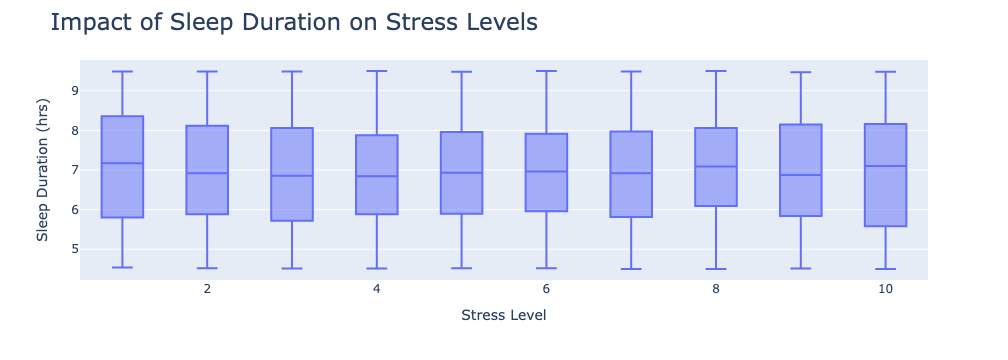

In [109]:
# create a figure showing box plots describing the sleep duration at each stress level
fig = px.box(sleep_stress_mood, 
             x = "Stress Level (rounded)",
             y = "Total Sleep Hours")

# adjust formatting
fig.update_layout(title_text = "Impact of Sleep Duration on Stress Levels",
                  title_font_size = 23,
                  xaxis_title = "Stress Level",
                  yaxis_title = "Sleep Duration (hrs)")

# show figure
fig.show()

The bar plot above describes the average sleep duration across individuals who exhibited each stress level. Results suggest that individuals across all stress levels had similar sleep durations.

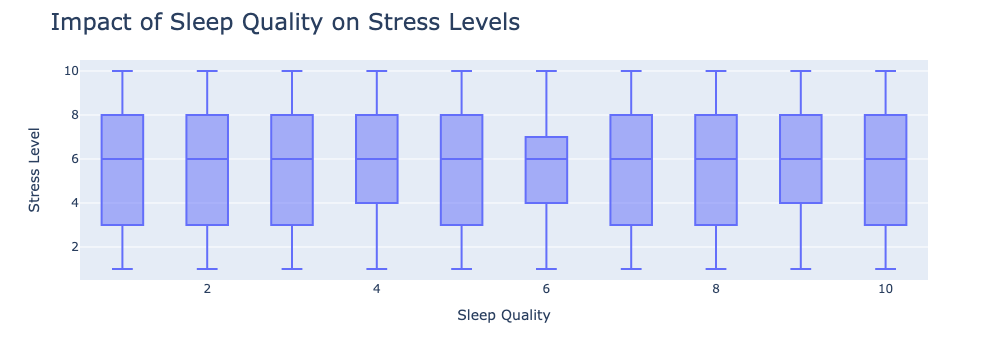

In [110]:
# create a figure showing box plots describing the stress levels of individuals at each level of sleep quality
fig = px.box(sleep_stress_mood, 
             x = "Sleep Quality (rounded)",
             y = "Stress Level (rounded)")

# adjust formatting
fig.update_layout(title_text = "Impact of Sleep Quality on Stress Levels",
                  title_font_size = 23,
                  xaxis_title = "Sleep Quality",
                  yaxis_title = "Stress Level")

# show plot
fig.show()

### *Do sleep duration and sleep quality affect mood?*

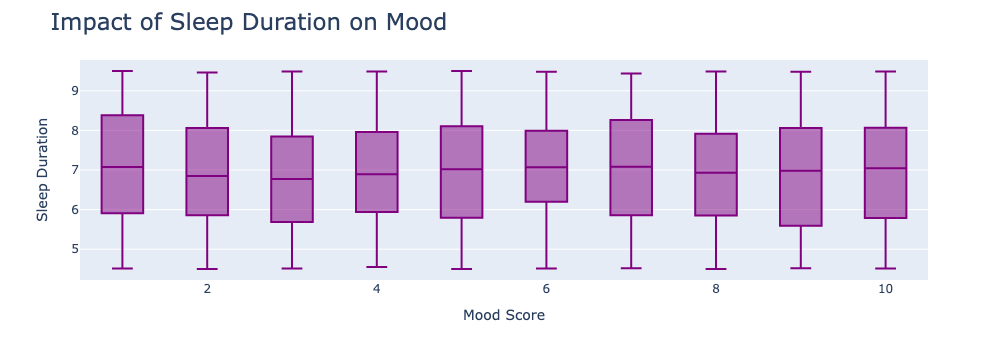

In [99]:
# create a figure showing box plots describing the sleep duration of individuals at each mood score
fig = px.box(sleep_stress_mood, 
             x = "Mood Score (rounded)",
             y = "Total Sleep Hours")

# adjust formatting
fig.update_traces(marker_color="purple")
fig.update_layout(title_text = "Impact of Sleep Duration on Mood",
                  title_font_size = 23,
                  xaxis_title = "Mood Score",
                  yaxis_title = "Sleep Duration")

# show plot
fig.show()

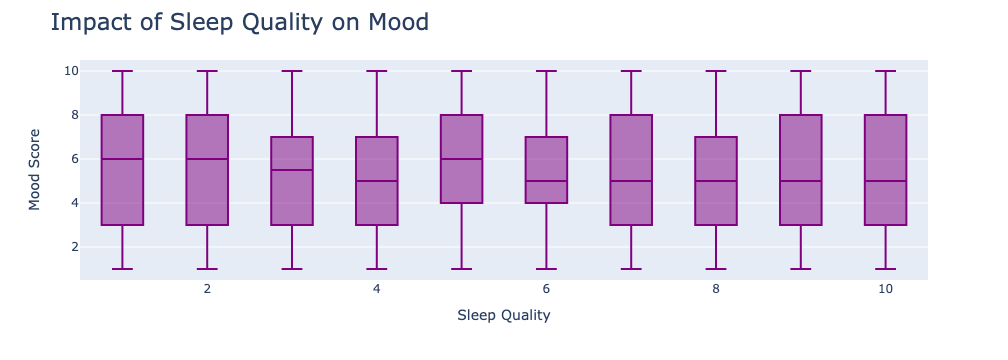

In [113]:
# create a figure showing box plots describing the mood score of individuals at each sleep quality score
fig = px.box(sleep_stress_mood, 
             x = "Sleep Quality (rounded)",
             y = "Mood Score (rounded)")

# adjust formatting
fig.update_traces(marker_color="purple")
fig.update_layout(title_text = "Impact of Sleep Quality on Mood",
                  title_font_size = 23,
                  xaxis_title = "Sleep Quality",
                  yaxis_title = "Mood Score")

# show plot
fig.show()